In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
players = pd.read_csv('Resources/tennis_atp-master/atp_players.csv', index_col='player_id', parse_dates=['birthdate'])
players.info()
players.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54067 entries, 100001 to 209032
Data columns (total 5 columns):
name_first    53890 non-null object
name_list     54025 non-null object
hand          48289 non-null object
birthdate     43099 non-null datetime64[ns]
country       54067 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 2.5+ MB


,name_first,name_list,hand,birthdate,country
player_id,,,,,
100001,Gardnar,Mulloy,R,1913-11-22,USA
100002,Pancho,Segura,R,1921-06-20,ECU
100003,Frank,Sedgman,R,1927-10-02,AUS
100004,Giuseppe,Merlo,R,1927-10-11,ITA
100005,Richard Pancho,Gonzales,R,1928-05-09,USA


In [3]:
players.columns = ['name_first', 'name_last', 'hand', 'birthdate', 'country']

In [4]:
players.hand.fillna('U', inplace=True)
players.hand = players.hand.astype('category')

In [5]:
players.country = players.country.astype('category')

In [6]:
players.info()
players.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54067 entries, 100001 to 209032
Data columns (total 5 columns):
name_first    53890 non-null object
name_last     54025 non-null object
hand          54067 non-null category
birthdate     43099 non-null datetime64[ns]
country       54067 non-null category
dtypes: category(2), datetime64[ns](1), object(2)
memory usage: 1.8+ MB


,name_first,name_last,hand,birthdate,country
player_id,,,,,
100001,Gardnar,Mulloy,R,1913-11-22,USA
100002,Pancho,Segura,R,1921-06-20,ECU
100003,Frank,Sedgman,R,1927-10-02,AUS
100004,Giuseppe,Merlo,R,1927-10-11,ITA
100005,Richard Pancho,Gonzales,R,1928-05-09,USA


Text(0.5, 1.0, 'Top 10 countries by count of professional tennis players')

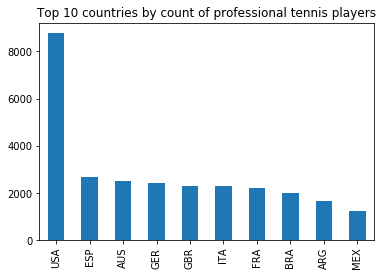

In [7]:
players.country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries by count of professional tennis players')

In [8]:
players[players.birthdate < '1950'].birthdate.count()

1655

Text(0.5, 1.0, 'Top 10 countries by count of professional tennis players born after 1990')

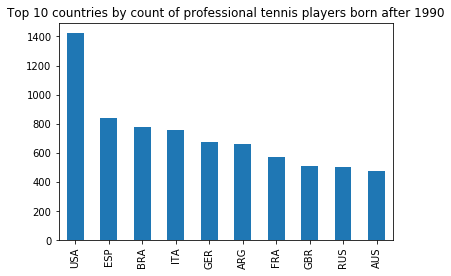

In [9]:
players[players.birthdate > '1990'].country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries by count of professional tennis players born after 1990')

In [10]:
players.to_csv('Resources/tennis_clean/atp_players.csv')

In [11]:
ranking_files = glob.glob('Resources/tennis_atp-master/atp_rankings_*')

In [12]:
rankings_list = [pd.read_csv(ranking_file, parse_dates=['ranking_date']) for ranking_file in ranking_files]

In [13]:
rankings = pd.concat(rankings_list)
rankings.columns = ['ranking_date', 'player_rank', 'player_id', 'points']
rankings.player_rank.astype('int', inplace=True)
rankings.info()
rankings.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2782234 entries, 0 to 265732
Data columns (total 4 columns):
ranking_date    datetime64[ns]
player_rank     int64
player_id       int64
points          float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 106.1 MB


,ranking_date,player_rank,player_id,points
0,2000-01-10,1,101736,4135.0
1,2000-01-10,2,102338,2915.0
2,2000-01-10,3,101948,2419.0
3,2000-01-10,4,103017,2184.0
4,2000-01-10,5,102856,2169.0


In [14]:
rankings = rankings.set_index(['player_id', 'ranking_date'])
rankings.sort_index(inplace=True)
rankings.to_csv('Resources/tennis_clean/atp_rankings.csv')

In [15]:
rankings.groupby('player_id').min().count()

player_rank    14456
points         12297
dtype: int64

In [16]:
rankings = rankings.groupby('player_id').filter(lambda x: x.player_rank.min() <= 100)

In [17]:
rankings.groupby('player_id').min().count()

player_rank    1073
points          813
dtype: int64

In [18]:
rankings.info()
rankings.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 526878 entries, (100011, 1973-08-27 00:00:00) to (200282, 2019-02-25 00:00:00)
Data columns (total 2 columns):
player_rank    526878 non-null int64
points         429117 non-null float64
dtypes: float64(1), int64(1)
memory usage: 10.2 MB


player_rank  points
player_id ranking_date                     
100011    1973-08-27            114     NaN
          1973-09-17            114     NaN
          1973-10-01            101     NaN
          1973-10-15             96     NaN
          1973-11-05            102     NaN

In [19]:
rankings = rankings.reset_index('player_id')
rankings.info()
rankings.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 526878 entries, 1973-08-27 to 2019-02-25
Data columns (total 3 columns):
player_id      526878 non-null int64
player_rank    526878 non-null int64
points         429117 non-null float64
dtypes: float64(1), int64(2)
memory usage: 16.1 MB


,player_id,player_rank,points
ranking_date,,,
1973-08-27,100011,114,NaN
1973-09-17,100011,114,NaN
1973-10-01,100011,101,NaN
1973-10-15,100011,96,NaN
1973-11-05,100011,102,NaN


In [20]:
top_100 = rankings.player_id.unique()

In [21]:
top_100_players = players.loc[top_100]
top_100_players.head()

,name_first,name_last,hand,birthdate,country
player_id,,,,,
100011,Torben,Ulrich,L,1932-10-04,DEN
100016,Ken,Rosewall,R,1934-11-02,AUS
100022,Roy,Emerson,R,1936-11-03,AUS
100025,Barry,Phillips Moore,R,1937-07-09,AUS
100026,Andres,Gimeno,R,1937-08-03,ESP


In [22]:
rankings.to_csv('Resources/tennis_clean/atp_top_100_rankings.csv')

In [23]:
top_100_players.to_csv('Resources/tennis_clean/atp_top_100_players.csv')

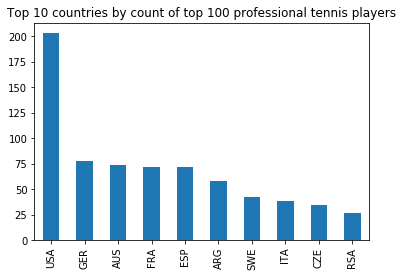

In [24]:
top_100_players.country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries by count of top 100 professional tennis players')
plt.savefig('plot.jpg')

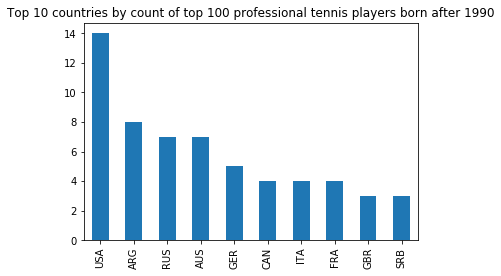

In [25]:
top_100_players[top_100_players.birthdate > '1990'].country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries by count of top 100 professional tennis players born after 1990')
plt.savefig('plot.jpg')

In [26]:
# I don't want any of the challenger or future match data, which is why I specify the first digit of the year.
matches_files = glob.glob('Resources/tennis_atp-master/atp_matches_[12]*')

In [27]:
matches_list = [pd.read_csv(matches_file, parse_dates=['tourney_date']) for matches_file in matches_files]

In [28]:
matches = pd.concat(matches_list, sort=False)

In [29]:
matches.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [30]:
matches_winners = matches[['winner_id', 'tourney_id', 'match_num', 'winner_name', 'tourney_name',
                           'surface', 'draw_size', 'tourney_level',
       'tourney_date',  'winner_seed', 'winner_entry',
       'winner_ht',
       'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_rank', 'loser_rank_points',
        'l_1stWon', 'l_2ndWon', 'l_svpt', 'l_1stIn', 'l_bpSaved', 'l_bpFaced']]

In [31]:
matches_losers = matches[['loser_id', 'tourney_id', 'match_num', 'loser_name', 'tourney_name',
                           'surface', 'draw_size', 'tourney_level',
       'tourney_date',  'loser_seed', 'loser_entry',
       'loser_ht',
       'score', 'best_of', 'round',
       'minutes', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon',
       'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'loser_rank', 'loser_rank_points', 'winner_id', 'winner_rank', 'winner_rank_points',
        'w_1stWon', 'w_2ndWon', 'w_svpt', 'w_1stIn', 'w_bpSaved', 'w_bpFaced']]

In [32]:
matches_winners.columns = ['player_id', 'tournament_id', 'match_id', 'player_name', 'tournament_name', 'surface',
       'draw_size', 'tournament_level', 'tournament_date', 'seed',
       'entry', 'player_height', 'score', 'best_of', 'round_of',
       'minutes', 'aces', 'double_faults', 'service_points', 'first_serves', 'first_serves_won', 'second_serves_won',
       'service_games', 'break_points_saved', 'break_points_faced', 'player_rank',
       'ranking_points', 'opponent_id', 'opponent_rank', 'opponent_ranking_points',
        'opponent_first_serves_won', 'opponent_second_serves_won', 'opponent_service_points', 'opponent_first_serves', 'opponent_break_points_saved', 'opponent_break_points_faced']
matches_losers.columns = ['player_id', 'tournament_id', 'match_id', 'player_name', 'tournament_name', 'surface',
       'draw_size', 'tournament_level', 'tournament_date', 'seed',
       'entry', 'player_height', 'score', 'best_of', 'round_of',
       'minutes', 'aces', 'double_faults', 'service_points', 'first_serves', 'first_serves_won', 'second_serves_won',
       'service_games', 'break_points_saved', 'break_points_faced', 'player_rank',
       'ranking_points', 'opponent_id', 'opponent_rank', 'opponent_ranking_points',
        'opponent_first_serves_won', 'opponent_second_serves_won', 'opponent_service_points', 'opponent_first_serves', 'opponent_break_points_saved', 'opponent_break_points_faced']

In [33]:
matches_winners['result'] = 'W'
matches_losers['result'] = 'L'

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
matches = pd.concat([matches_winners, matches_losers])
matches.set_index(['player_id', 'tournament_id', 'match_id'], inplace=True)
matches.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 339380 entries, (106045, 2019-M020, 271) to (104755, 2014-D015, 4)
Data columns (total 34 columns):
player_name                    339380 non-null object
tournament_name                339380 non-null object
surface                        334302 non-null object
draw_size                      2464 non-null float64
tournament_level               339380 non-null object
tournament_date                339380 non-null datetime64[ns]
seed                           98148 non-null float64
entry                          40087 non-null object
player_height                  289936 non-null float64
score                          339028 non-null object
best_of                        339380 non-null int64
round_of                       339380 non-null object
minutes                        164206 non-null float64
aces                           166830 non-null float64
double_faults                  166830 non-null float64
service_points                 

In [35]:
# Corrections to errant data here
# 1. 1991 Tokyo Outdoor tournament has an impossible value for Jim Courier's break point values.
#    Fix: An analysis of the score shows that the values are offset by 4. These are corrected.
# Courier
matches.loc[(101793, '1991-329', 54), 'break_points_faced'] = 4.
matches.loc[(101793, '1991-329', 54), 'break_points_saved'] = 0.
# Courier
matches.loc[(100656, '1991-329', 54), 'opponent_break_points_faced'] = 4.
matches.loc[(100656, '1991-329', 54), 'opponent_break_points_saved'] = 0.
# 2. 1991 Tokyo Outdoor tournament has an impossible value for Ivan Lendl's break point values.
#    Fix: The score has too many possibilities to narrow it down, so I will set the break points to NaN to avoid
#    propogating the errors any farther down the pipeline.
# Lendl
matches.loc[(100656, '1991-329', 55), 'break_points_faced'] = np.nan
matches.loc[(100656, '1991-329', 55), 'break_points_saved'] = np.nan
# Edberg
matches.loc[(101222, '1991-329', 55), 'opponent_break_points_faced'] = np.nan
matches.loc[(101222, '1991-329', 55), 'opponent_break_points_saved'] = np.nan

# Lendl must have distracted stat taker, as these are the only two individual instances of mistakes in the dataset.

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2848: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


In [36]:
players[players.name_last == 'Edberg']

,name_first,name_last,hand,birthdate,country
player_id,,,,,
101222,Stefan,Edberg,R,1966-01-19,SWE


In [37]:
# 3. The 2003 Madrid Masters has many instances where the service points won column 
#    exceeds the total service points played. All instances of service points
#    played and won are set to NaN for this tournament.
# 'service_points', 'first_serves', 'first_serves_won', 'second_serves_won'

madrid_2003_matches = matches.query('tournament_id == \'2003-1536\'').index
matches.loc[madrid_2003_matches, 'service_points'] = np.nan
matches.loc[madrid_2003_matches, 'first_serves'] = np.nan
matches.loc[madrid_2003_matches, 'first_serves_won'] = np.nan
matches.loc[madrid_2003_matches, 'second_serves_won'] = np.nan
matches.loc[madrid_2003_matches, 'opponent_service_points'] = np.nan
matches.loc[madrid_2003_matches, 'opponent_first_serves'] = np.nan
matches.loc[madrid_2003_matches, 'opponent_first_serves_won'] = np.nan
matches.loc[madrid_2003_matches, 'opponent_second_serves_won'] = np.nan

In [38]:
long_long_matches = matches.query('tournament_id == \'2016-M001\' and match_id == 294 \
                                or tournament_id == \'2017-0308\' and match_id == 297').index
matches.loc[long_long_matches, 'minutes'] = np.nan

(0.5979379693938744, 0.0, 1.0)

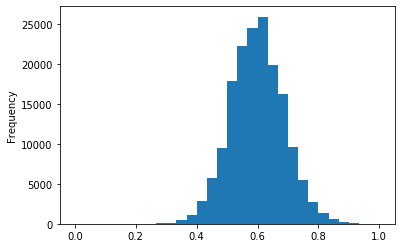

In [39]:
matches['first_serve_percentage'] = matches.first_serves / matches.service_points
matches.first_serve_percentage.plot(kind='hist', bins=30)
# No anomomylous data
matches.first_serve_percentage.mean(), matches.first_serve_percentage.min(), matches.first_serve_percentage.max()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0.5772107208974743, 0.0, 1.0)

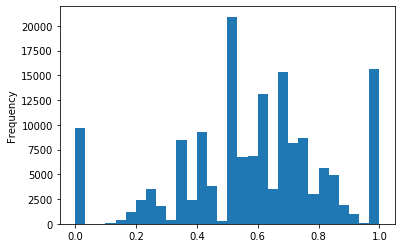

In [40]:
matches['break_points_save_percentage'] = (matches.break_points_saved / matches.break_points_faced)
matches.break_points_save_percentage[~np.isfinite(matches.break_points_save_percentage)] = np.nan
matches.break_points_save_percentage.plot(kind='hist', bins=30)
# Initially two data points resulted in a negative percentage, and were corrected. 
matches.break_points_save_percentage.mean(), matches.break_points_save_percentage.min(), matches.break_points_save_percentage.max()

In [41]:

matches.query('tournament_id == \'1991-329\' and match_id == 55')[['player_name', 'score', 'break_points_saved', 'break_points_faced', 'result']]

,,,player_name,score,break_points_saved,break_points_faced,result
player_id,tournament_id,match_id,,,,,
101222,1991-329,55,Stefan Edberg,6-1 7-5 6-0,6.0,8.0,W
100656,1991-329,55,Ivan Lendl,6-1 7-5 6-0,NaN,NaN,L


(0.6259750644648816, 0.0, 1.0)

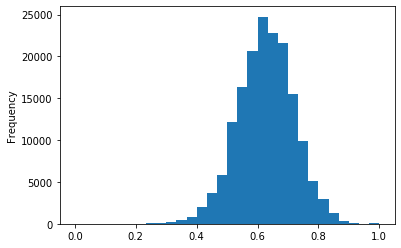

In [42]:
matches['service_points_won'] = matches.first_serves_won + matches.second_serves_won
matches['service_points_won_percentage'] = matches.service_points_won / matches.service_points
matches.service_points_won_percentage.plot(kind='hist', bins=30)
matches.service_points_won_percentage.mean(), matches.service_points_won_percentage.min(), matches.service_points_won_percentage.max()

In [43]:
matches['points'] = matches.service_points + matches.opponent_service_points
matches.points.mean(), matches.points.min(), matches.points.max() 

(158.6581182228193, 1.0, 980.0)

In [44]:
matches['return_points'] = matches.points - matches.service_points
matches.return_points.mean(), matches.return_points.min(), matches.return_points.max() 

(79.32905911140965, 0.0, 491.0)

(0.3740249355354508, 0.0, 1.0)

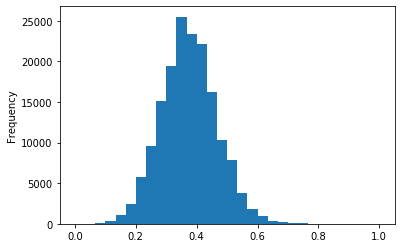

In [45]:
matches['return_points_won'] = matches.return_points - (matches.opponent_first_serves_won + matches.opponent_second_serves_won)
matches['return_points_won_percentage'] = matches.return_points_won / matches.return_points
matches.return_points_won_percentage.plot(kind='hist', bins=30)
matches.return_points_won_percentage.mean(), matches.return_points_won_percentage.min(), matches.return_points_won_percentage.max()

(0.7100315681182388, 0.0, 1.0)

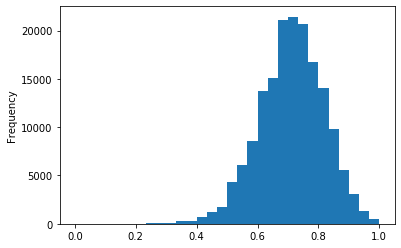

In [46]:
matches['first_serves_won_percentage'] = matches.first_serves_won / matches.first_serves
matches.first_serves_won_percentage.plot(kind='hist', bins=30)
matches.first_serves_won_percentage.mean(), matches.first_serves_won_percentage.min(), matches.first_serves_won_percentage.max()

(0.5048184906046367, 0.0, 1.0)

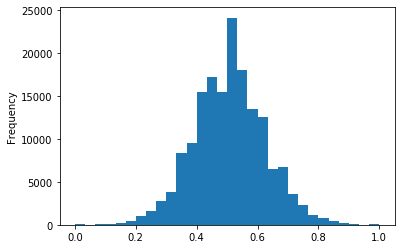

In [47]:
matches['second_serves_won_percentage'] = matches.second_serves_won / (matches.service_points - matches.first_serves)
matches.second_serves_won_percentage.plot(kind='hist', bins=30)
matches.second_serves_won_percentage.mean(), matches.second_serves_won_percentage.min(), matches.second_serves_won_percentage.max()

(0.289968431882156, 0.0, 1.0)

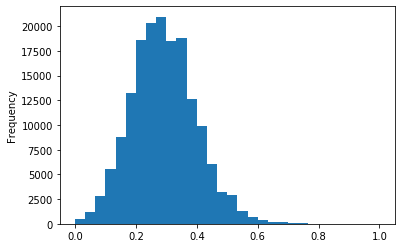

In [48]:
matches['first_serve_return_points_won'] = matches.opponent_first_serves - matches.opponent_first_serves_won
matches['first_serve_return_points_won_percentage'] = matches.first_serve_return_points_won / matches.opponent_first_serves
matches.first_serve_return_points_won_percentage.plot(kind='hist', bins=30)
matches.first_serve_return_points_won_percentage.mean(), matches.first_serve_return_points_won_percentage.min(), matches.first_serve_return_points_won_percentage.max()

(0.4951815093950954, 0.0, 1.0)

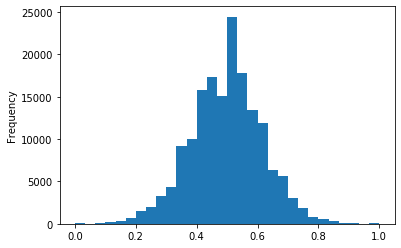

In [49]:
matches['second_serve_return_points_won'] = matches.opponent_service_points - matches.opponent_first_serves - matches.opponent_second_serves_won
matches['second_serve_return_points_won_percentage'] = matches.second_serve_return_points_won / (matches.opponent_service_points - matches.opponent_first_serves)
matches.second_serve_return_points_won_percentage.plot(kind='hist', bins=30)
matches.second_serve_return_points_won_percentage.mean(), matches.second_serve_return_points_won_percentage.min(), matches.second_serve_return_points_won_percentage.max()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(0.42278927910259284, 0.0, 1.0)

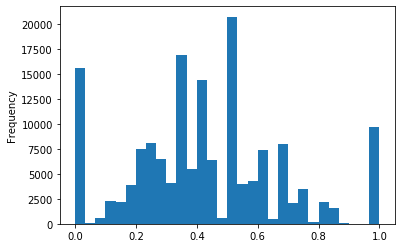

In [50]:
matches['break_points'] = matches.opponent_break_points_faced
matches['break_points_won'] = matches.opponent_break_points_faced - matches.opponent_break_points_saved
matches['break_points_won_percentage'] = matches.break_points_won / matches.break_points
matches.break_points_won_percentage[~np.isfinite(matches.break_points_won_percentage)] = np.nan
matches.break_points_won_percentage.plot(kind='hist', bins=30)
matches.break_points_won_percentage.mean(), matches.break_points_won_percentage.min(), matches.break_points_won_percentage.max()

(0.49999999999982536, 0.0, 1.0)

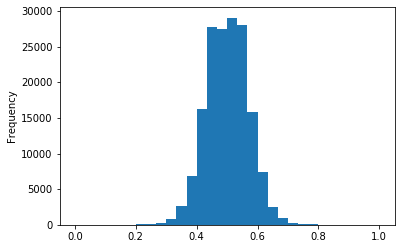

In [51]:
matches['points_won'] = matches.service_points_won + matches.return_points_won
matches['points_won_percentage'] = matches.points_won / matches.points
matches.points_won_percentage.plot(kind='hist', bins=30)
# I don't know what I expected.gif
matches.points_won_percentage.mean(), matches.points_won_percentage.min(), matches.points_won_percentage.max()

40.04820200614823

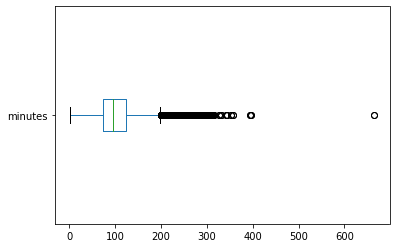

In [52]:
matches.minutes.plot(kind='box', vert=False)
matches.minutes.std()

In [53]:
matches = matches[['player_name', 'tournament_name', 'surface', 'draw_size', 'tournament_level',
       'tournament_date', 'seed', 'entry', 'player_height', 'score', 'best_of',
       'round_of', 'minutes', 'aces', 'double_faults', 'service_points',
       'first_serves', 'first_serves_won', 'second_serves_won',
       'service_games', 'break_points_saved', 'break_points_faced',
       'player_rank', 'ranking_points', 'opponent_id', 'opponent_rank',
       'opponent_ranking_points', 'result', 'first_serve_percentage',
       'break_points_save_percentage', 'service_points_won',
       'service_points_won_percentage', 'points', 'return_points',
       'return_points_won', 'return_points_won_percentage',
       'first_serves_won_percentage', 'second_serves_won_percentage',
       'first_serve_return_points_won',
       'first_serve_return_points_won_percentage',
       'second_serve_return_points_won',
       'second_serve_return_points_won_percentage', 'break_points',
       'break_points_won', 'break_points_won_percentage', 'points_won',
       'points_won_percentage']]

In [54]:
matches.result = matches.result.astype('category')
matches.surface = matches.surface.astype('category')
matches.tournament_level = matches.tournament_level.astype('category')
matches.round_of = matches.round_of.astype('category')
matches.result = matches.result.astype('category')

In [55]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 339380 entries, (106045, 2019-M020, 271) to (104755, 2014-D015, 4)
Data columns (total 47 columns):
player_name                                  339380 non-null object
tournament_name                              339380 non-null object
surface                                      334302 non-null category
draw_size                                    2464 non-null float64
tournament_level                             339380 non-null category
tournament_date                              339380 non-null datetime64[ns]
seed                                         98148 non-null float64
entry                                        40087 non-null object
player_height                                289936 non-null float64
score                                        339028 non-null object
best_of                                      339380 non-null int64
round_of                                     339380 non-null category
minutes               

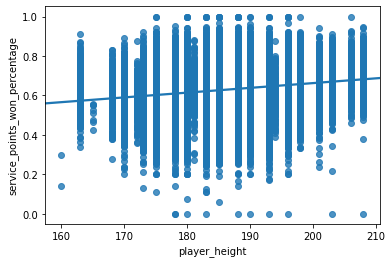

In [56]:
import seaborn as sns

sns.regplot(matches.player_height, matches.service_points_won_percentage)

In [57]:
matches['result_value'] = [1 if result == 'W' else 0 for result in matches.result]

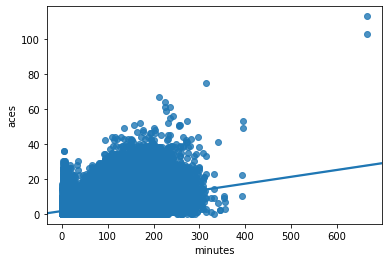

In [58]:
sns.regplot(matches.minutes, matches.aces)

In [59]:
matches.to_csv('Resources/tennis_clean/atp_matches.csv')

In [61]:
matches.reset_index(inplace=True)
matches.set_index('player_id', inplace=True)
top_100_matches = matches.loc[top_100]
top_100_matches.reset_index(inplace=True)
top_100_matches.set_index(['player_id', 'tournament_id', 'match_id'], inplace=True)
top_100_matches.sort_index()
top_100_matches.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


player_name tournament_name surface  \
player_id tournament_id match_id                                          
100011    1969-560      174.0     Torben Ulrich         US Open   Grass   
                        238.0     Torben Ulrich         US Open   Grass   
          1968-560      6.0       Torben Ulrich         US Open   Grass   
                        43.0      Torben Ulrich         US Open   Grass   
                        70.0      Torben Ulrich         US Open   Grass   

                                  draw_size tournament_level tournament_date  \
player_id tournament_id match_id                                               
100011    1969-560      174.0           NaN                G      1969-08-27   
                        238.0           NaN                G      1969-08-27   
          1968-560      6.0            96.0                G      1968-08-29   
                        43.0           96.0                G      1968-08-29   
                        70.0           96.0                G      1968-08-29   

                                  seed entry  player_height            score  \
player_id tournament_id match_id                                               
100011    1969-560      174.0      NaN   NaN            NaN     7-5 6-3 10-8   
                        238.0      NaN   NaN            NaN      6-4 6-4 6-3   
          1968-560      6.0        NaN   NaN            NaN      6-4 6-3 6-3   
                        43.0       NaN   NaN            NaN  3-6 6-2 6-3 6-2   
                        70.0       NaN   NaN            NaN      6-4 6-4 6-2   

                                  ...  first_serve_return_points_won  \
player_id tournament_id match_id  ...                                  
100011    1969-560      174.0     ...                            NaN   
                        238.0     ...                            NaN   
          1968-560      6.0       ...                            NaN   
                        43.0      ...                            NaN   
                        70.0      ...                            NaN   

                                 first_serve_return_points_won_percentage  \
player_id tournament_id match_id                                            
100011    1969-560      174.0                                         NaN   
                        238.0                                         NaN   
          1968-560      6.0                                           NaN   
                        43.0                                          NaN   
                        70.0                                          NaN   

                                  second_serve_return_points_won  \
player_id tournament_id match_id                                   
100011    1969-560      174.0                                NaN   
                        238.0                                NaN   
          1968-560      6.0                                  NaN   
                        43.0                                 NaN   
                        70.0                                 NaN   

                                  second_serve_return_points_won_percentage  \
player_id tournament_id match_id                                              
100011    1969-560      174.0                                           NaN   
                        238.0                                           NaN   
          1968-560      6.0                                             NaN   
                        43.0                                            NaN   
                        70.0                                            NaN   

                                  break_points  break_points_won  \
player_id tournament_id match_id                                   
100011    1969-560      174.0              NaN               NaN   
                        238.0              NaN               NaN   
          1968-560      6.0             

In [63]:
top_100_matches.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 295733 entries, (100011, 1969-560, 174.0) to (200282, 2017-560, 131.0)
Data columns (total 48 columns):
player_name                                  295730 non-null object
tournament_name                              295730 non-null object
surface                                      292670 non-null category
draw_size                                    1143 non-null float64
tournament_level                             295730 non-null category
tournament_date                              295730 non-null datetime64[ns]
seed                                         97561 non-null float64
entry                                        28839 non-null object
player_height                                272508 non-null float64
score                                        295506 non-null object
best_of                                      295730 non-null float64
round_of                                     295730 non-null category
minutes         

In [62]:
top_100_matches.to_csv('Resources/tennis_clean/atp_top_100_matches.csv')